In [3]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [9]:
database_path = "./data/R&D_automotive_good.xls"

In [10]:
data = pd.read_excel(database_path)

In [13]:
data

,Company,Year,Country,R&D (€million),R&D one-year growth (%),Net sales (€million),Net sales one-year growth (%),R&D intensity (%),Capex (€million),Capex one-year growth (%),Capex intensity (%),Op.profits (€million),Profitability (%),Employees
0,VOLKSWAGEN,NaN,Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,VOLKSWAGEN,2011.0,Germany,7203.000,15.100671,159337.000,25.585813,4.520607,8087.000,-36.660000,5.075406,10930.000,6.859675,400070.0
2,VOLKSWAGEN,2012.0,Germany,9515.000,32.100000,193000.000,21.400000,4.900000,10493.000,29.800000,5.400000,8333.000,4.300000,525245.0
3,VOLKSWAGEN,2013.0,Germany,11743.000,23.415659,197007.000,2.247815,5.960702,11385.000,8.500000,5.778982,11500.000,5.837356,572800.0
4,VOLKSWAGEN,2014.0,Germany,13120.000,11.726135,202458.000,2.766907,6.480356,12012.000,5.556522,5.933082,12139.000,5.995811,592586.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,GESTAMP,2018.0,NaN,85.790,17.932504,8547.638,4.219521,1.003669,793.976,0.829903,9.288835,524.290,6.133741,43552.0
386,GESTAMP,2019.0,NaN,74.280,-13.416482,9065.146,6.054398,0.819402,718.473,-9.509481,7.925664,505.646,5.577913,43822.0
387,GESTAMP,2020.0,NaN,58.849,-20.774100,7455.840,-17.752700,0.789300,483.133,-32.755600,6.479900,58.257,0.781400,40811.0
388,GESTAMP,2021.0,NaN,71.309,21.172832,8092.845,8.543705,0.881136,516.020,6.807028,6.376250,414.147,5.117446,39908.0


In [11]:
data.shape[0]

390

In [14]:
data = data.drop(columns=['Employees'])

In [15]:
data = data.drop(columns=['Country'])

In [16]:
df_cleaned = data.dropna()

In [17]:
df_cleaned.shape[0]

336

In [18]:
df_cleaned = df_cleaned.reset_index(drop=True)

In [19]:
df_cleaned

,Company,Year,R&D (€million),R&D one-year growth (%),Net sales (€million),Net sales one-year growth (%),R&D intensity (%),Capex (€million),Capex one-year growth (%),Capex intensity (%),Op.profits (€million),Profitability (%)
0,VOLKSWAGEN,2011.0,7203.000,15.100671,159337.000,25.585813,4.520607,8087.000,-36.660000,5.075406,10930.000,6.859675
1,VOLKSWAGEN,2012.0,9515.000,32.100000,193000.000,21.400000,4.900000,10493.000,29.800000,5.400000,8333.000,4.300000
2,VOLKSWAGEN,2013.0,11743.000,23.415659,197007.000,2.247815,5.960702,11385.000,8.500000,5.778982,11500.000,5.837356
3,VOLKSWAGEN,2014.0,13120.000,11.726135,202458.000,2.766907,6.480356,12012.000,5.556522,5.933082,12139.000,5.995811
4,VOLKSWAGEN,2015.0,13612.000,3.750000,213292.000,5.351233,6.381861,13213.000,10.000000,6.194794,-1228.000,-0.575737
...,...,...,...,...,...,...,...,...,...,...,...,...
331,GESTAMP,2018.0,85.790,17.932504,8547.638,4.219521,1.003669,793.976,0.829903,9.288835,524.290,6.133741
332,GESTAMP,2019.0,74.280,-13.416482,9065.146,6.054398,0.819402,718.473,-9.509481,7.925664,505.646,5.577913
333,GESTAMP,2020.0,58.849,-20.774100,7455.840,-17.752700,0.789300,483.133,-32.755600,6.479900,58.257,0.781400
334,GESTAMP,2021.0,71.309,21.172832,8092.845,8.543705,0.881136,516.020,6.807028,6.376250,414.147,5.117446


## The Jarque-Bera test is a goodness-of-fit test of whether sample data have the skewness and kurtosis matching a normal distribution

In [20]:
from scipy.stats import jarque_bera

# Function to apply Jarque-Bera test
def jarque_bera_test(df):
    results = {}
    for column in df.columns:
        jb_stat, p_value = jarque_bera(df[column])
        results[column] = {'Jarque-Bera Statistic': jb_stat, 'p-value': p_value}
    return pd.DataFrame(results)

In [34]:
features = df_cleaned[['Op.profits (€million)', 'Net sales (€million)', 'R&D  (€million)', 'Capex (€million)']]

In [35]:
features = features.dropna()

In [36]:
jb_results = jarque_bera_test(features)


In [37]:
# Display the results
print(jb_results)

                       Op.profits (€million)  Net sales (€million)  \
Jarque-Bera Statistic             570.928044            156.701516   
p-value                             0.000000              0.000000   

                       R&D  (€million)  Capex (€million)  
Jarque-Bera Statistic       404.417963       1296.986103  
p-value                       0.000000          0.000000  


p-value < 0 -> **data does NOT follow a normal distribution**

## The Breusch-Pagan test checks for heteroskedasticity in a regression model, which is the condition where the variance of the residuals is not constant.

Heteroskedasticity refers to the condition in a regression model where the variance of the residuals (the differences between the observed and predicted values) is not constant across all levels of the independent variable(s). This violates one of the key assumptions of ordinary least squares (OLS) regression, which assumes homoskedasticity, meaning that the residuals have constant variance.



In [41]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import het_breuschpagan

In [48]:
features = df_cleaned[['Op.profits (€million)', 'R&D  (€million)', 'Capex (€million)']]

In [42]:
# Define the independent variables (explanatory variables) and the dependent variable (response variable)
X = df_cleaned[['R&D  (€million)', 'Capex (€million)', ]]
y = df_cleaned['Op.profits (€million)']

In [43]:
# Add a constant to the independent variables matrix
X = sm.add_constant(X)

In [44]:
# Fit the regression model
model = sm.OLS(y, X).fit()

In [45]:
# Perform the Breusch-Pagan test
bp_test = het_breuschpagan(model.resid, model.model.exog)

# The test returns a tuple with the following elements:
# Lagrange multiplier statistic, p-value, f-value, f p-value
bp_test_results = {
    "Lagrange multiplier statistic": bp_test[0],
    "p-value": bp_test[1],
    "f-value": bp_test[2],
    "f p-value": bp_test[3]
}

In [46]:
# Display results
bp_test_results

{'Lagrange multiplier statistic': 14.124091423175825,
 'p-value': 0.0008570230774169547,
 'f-value': 7.306111328296234,
 'f p-value': 0.0007845867174464759}

Interpretation of Breusch-Pagan Test Results
Lagrange Multiplier Statistic: 14.124

This is the test statistic for the Breusch-Pagan test. It is derived from the regression of the squared residuals on the original independent variables.
Higher values of this statistic suggest a greater likelihood of heteroskedasticity being present.
p-value: 0.000857

This is the p-value associated with the Lagrange Multiplier statistic.
A low p-value (typically less than 0.05) indicates that we can reject the null hypothesis of homoskedasticity. In this case, the p-value is significantly lower than 0.05, suggesting strong evidence against the null hypothesis. Therefore, we conclude that heteroskedasticity is present in the model.
f-value: 7.306

This is the F-statistic for the auxiliary regression used in the Breusch-Pagan test.
It assesses the overall significance of the regression model used to predict the squared residuals. Higher values suggest that the model is better at explaining the variation in squared residuals.
f p-value: 0.000785

This is the p-value associated with the F-statistic.
Similar to the p-value for the Lagrange Multiplier statistic, a low f p-value indicates that the explanatory variables significantly explain the variance of the residuals. Since this value is also much lower than 0.05, it reinforces the conclusion that heteroskedasticity is present.
Summary

The results indicate that there is **strong evidence of heteroskedasticity** in your regression model. Specifically:

Both the Lagrange Multiplier statistic and the F-statistic are significantly high.
The corresponding p-values are well below the 0.05 threshold, indicating that the null hypothesis of homoskedasticity (constant variance of residuals) can be rejected.

## KPSS - The Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test is used to check for stationarity in a time series.

In [52]:
from statsmodels.tsa.stattools import kpss

In [54]:
# Function to apply KPSS test
def kpss_test(series, **kw):
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    return {
        'KPSS Statistic': statistic,
        'p-value': p_value,
        'Lags Used': n_lags,
        'Critical Values': critical_values
    }

In [55]:
features = df_cleaned[['Op.profits (€million)', 'R&D  (€million)', 'Capex (€million)']]

In [56]:
# Applying KPSS test to each column
results = {}
for column in features.columns:
    try:
        results[column] = kpss_test(features[column], regression='c')
    except Exception as e:
        results[column] = str(e)

In [57]:
results

{'Op.profits (€million)': {'KPSS Statistic': 1.4539460095395746,
  'p-value': 0.01,
  'Lags Used': 10,
  'Critical Values': {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}},
 'R&D  (€million)': {'KPSS Statistic': 2.0696372207472162,
  'p-value': 0.01,
  'Lags Used': 11,
  'Critical Values': {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}},
 'Capex (€million)': {'KPSS Statistic': 1.3564246346154993,
  'p-value': 0.01,
  'Lags Used': 11,
  'Critical Values': {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}}}

For all three series (Op.profits, R&D, and Capex), the KPSS test results indicate that they are **NOT stationary**. The high KPSS statistics and low p-values (all at 0.01) lead us to reject the null hypothesis of stationarity for each series. This suggests that these time series have trends or other non-stationary characteristics.

## Autocorrelation - is often used to find patterns or regularities in time series data.

The autocorrelation values provide insight into the degree of correlation between a time series and a lagged version of itself. 

In [58]:
import matplotlib.pyplot as plt


def plot_autocorrelation(df):
    for column in df.columns:
        fig, ax = plt.subplots()
        pd.plotting.autocorrelation_plot(df[column], ax=ax)
        ax.set_title(f'Autocorrelation for {column}')
        plt.show()

In [59]:
features = df_cleaned[['Op.profits (€million)', 'R&D  (€million)', 'Capex (€million)']]

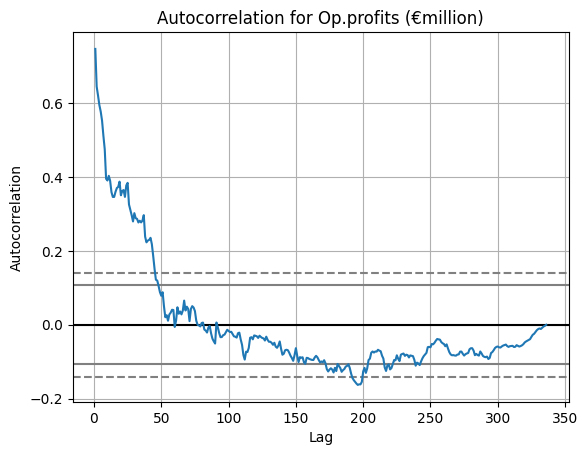

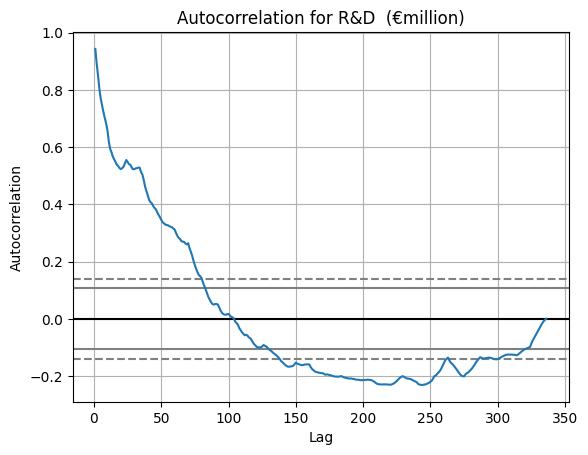

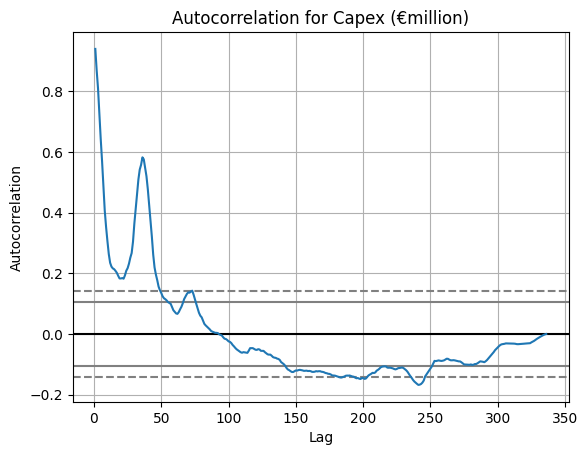

In [60]:
plot_autocorrelation(features)


In [61]:
# Calculating autocorrelation for specific lags
def calculate_autocorrelation(df, lag=1):
    autocorr_values = {}
    for column in df.columns:
        autocorr = df[column].autocorr(lag=lag)
        autocorr_values[column] = autocorr
    return autocorr_values

In [63]:
autocorr_values = calculate_autocorrelation(features, lag=1)
print(autocorr_values)

{'Op.profits (€million)': 0.7501432091367409, 'R&D  (€million)': 0.9467263609156868, 'Capex (€million)': 0.941138995186151}


1. Op.profits (€million): 0.750

An autocorrelation value of 0.750 suggests a strong positive correlation between the operating profits of the current year and the previous year. This indicates that the operating profits are relatively consistent and tend to follow a predictable pattern over time. In practical terms, if the operating profit is high in one year, it is likely to be high in the next year as well.

2. R&D (€million): 0.947

An autocorrelation value of 0.947 indicates a very strong positive correlation between the R&D spending of the current year and the previous year. This suggests that the company's R&D expenditures are highly consistent from year to year, showing a stable and predictable investment in research and development activities. If R&D spending increases in one year, it is very likely to increase in the following year as well.

3. Capex (€million): 0.941

An autocorrelation value of 0.941 also indicates a very strong positive correlation between the capital expenditures (Capex) of the current year and the previous year. This implies that the company's investment in capital assets tends to be very consistent over time. Similar to R&D, if Capex increases in one year, it is highly likely to increase in the next year as well.

The high autocorrelation values for "R&D (€million)" and "Capex (€million)" suggest that these expenditures are very stable and follow a predictable trend over time. The "Op.profits (€million)" also shows a strong positive correlation, indicating consistent operating profits year over year. These patterns can be useful for forecasting future values, as the past values provide a reliable indication of future trends.

## Multicollinearity

1. When predictors are highly correlated, it becomes challenging to determine the individual effect of each predictor on the dependent variable. 
2. Multicollinearity can cause instability in the estimation of regression coefficients. Small changes in the data can lead to large variations in the coefficients, making the model unreliable.
3. High multicollinearity inflates the standard errors of the regression coefficients, leading to wider confidence intervals and less precise estimates.


Consider a business context where you are analyzing the factors affecting a company's operational profits. If you have predictors like R&D expenditure, net sales, and capital expenditure, multicollinearity among these variables can obscure the true impact of each on operational profits. By addressing multicollinearity, you can gain clearer insights into which factors most significantly drive profitability, allowing for more informed strategic decisions.

In [65]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt

In [86]:
features = df_cleaned[['R&D one-year growth (%)', 'Capex one-year growth (%)', 'Profitability (%)', 'Net sales (€million)', 'Net sales one-year growth (%)', 'Op.profits (€million)', 'R&D  (€million)', 'Capex (€million)']]

In [91]:
features_pair = df_cleaned[['Op.profits (€million)', 'R&D  (€million)', 'Capex (€million)']]

In [92]:
features = features_pair 

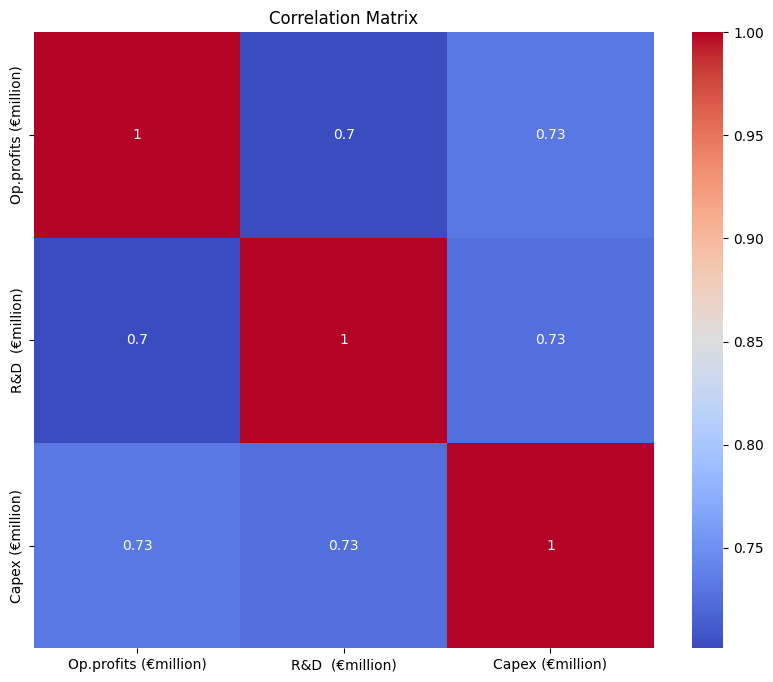

In [93]:
# Step 1: Calculate the Correlation Matrix
correlation_matrix = features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [94]:
# Step 2: Calculate the Variance Inflation Factor (VIF)
X = features.select_dtypes(include=[np.number])  # Select only numeric columns
X = sm.add_constant(X)  # Add a constant term for the intercept

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [95]:
# Step 3: Display the VIF Data
vif_data = vif_data[vif_data["feature"] != "const"]  # Remove the constant term
print(vif_data)

                 feature       VIF
1  Op.profits (€million)  2.482570
2        R&D  (€million)  2.431136
3       Capex (€million)  2.664138


Correlation between variables indicates a linear relationship between them. If R&D and Capex are correlated with profits, it suggests that changes in R&D and Capex are associated with changes in profits. However, correlation alone does not necessarily mean that these variables are good estimators of profit

In [97]:
# Calculate correlation coefficients
correlation_with_profits = features[['Op.profits (€million)', 'R&D  (€million)', 'Capex (€million)']].corr()
print(correlation_with_profits)

                       Op.profits (€million)  R&D  (€million)  \
Op.profits (€million)               1.000000         0.701238   
R&D  (€million)                     0.701238         1.000000   
Capex (€million)                    0.732248         0.725517   

                       Capex (€million)  
Op.profits (€million)          0.732248  
R&D  (€million)                0.725517  
Capex (€million)               1.000000  


Strong Positive Correlations with Profits:

Both R&D (€million) and Capex (€million) have strong positive correlations with Op.profits (€million). This suggests that increases in R&D and Capex are associated with increases in operational profits. Therefore, R&D and Capex are likely good estimators of profits, as their increases align with profit increases.
Relationship between R&D and Capex:

The strong positive correlation between R&D (€million) and Capex (€million) suggests that these two expenditures are related. Companies investing heavily in R&D also tend to invest significantly in Capex. This could imply that both types of investments are part of a broader strategy to enhance operational efficiency and profitability.

Business Strategy:
For decision-makers, these correlations indicate that investments in R&D and Capex are beneficial for increasing operational profits. Firms should consider maintaining or increasing their spending in these areas to boost profitability.
Regression Analysis:
Since both R&D and Capex are strongly correlated with profits and each other, including them in a regression model as predictors of profits is appropriate. However, care should be taken due to their inter-correlation, which might still introduce some multicollinearity. 

The strong positive correlations between Op.profits (€million), R&D (€million), and Capex (€million) suggest that R&D and Capex are good predictors of operational profits. These investments are closely related and contribute significantly to profitability. By leveraging these insights, businesses can make informed decisions about allocating resources to R&D and Capex to maximize their operational profits.

In [98]:
import statsmodels.api as sm

# Define the independent variables (R&D and Capex)
X = features[['R&D  (€million)', 'Capex (€million)']]
X = sm.add_constant(X)  # Add a constant term for the intercept

# Define the dependent variable (Profits)
y = features['Op.profits (€million)']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display the regression results
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     Op.profits (€million)   R-squared:                       0.597
Model:                               OLS   Adj. R-squared:                  0.595
Method:                    Least Squares   F-statistic:                     246.8
Date:                   Tue, 06 Aug 2024   Prob (F-statistic):           1.77e-66
Time:                           15:56:53   Log-Likelihood:                -3167.5
No. Observations:                    336   AIC:                             6341.
Df Residuals:                        333   BIC:                             6352.
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const     

The regression results provide insights into the relationship between Op.profits (€million) (dependent variable) and the predictors R&D (€million) and Capex (€million) (independent variables). Here’s a detailed interpretation of the results:

Key Metrics:
R-squared: 0.597

This indicates that approximately 59.7% of the variance in operational profits is explained by the model, which includes R&D and Capex as predictors. While this is a moderate level of explanatory power, it suggests that there are other factors not included in the model that also influence profits.
Adj. R-squared: 0.595

The adjusted R-squared, which accounts for the number of predictors in the model, is slightly lower than the R-squared. This indicates that the model’s explanatory power is relatively robust and not inflated by the inclusion of irrelevant variables.
F-statistic: 246.8 (Prob: 1.77e-66)

The F-statistic tests the overall significance of the model. A very low p-value (much less than 0.05) indicates that the model is statistically significant, meaning that R&D and Capex, as a set, significantly predict operational profits.
Coefficients and Significance:
Intercept (const): 314.6276 (p = 0.150)

The intercept represents the expected value of operational profits when both R&D and Capex are zero. Its p-value (0.150) is above the typical significance level (0.05), indicating that the intercept is not statistically significant.
R&D (€million): 0.5360 (p < 0.0001)

The coefficient for R&D is 0.5360, which means that for every additional million euros spent on R&D, operational profits are expected to increase by approximately €0.536 million, holding Capex constant. The very low p-value indicates that this effect is statistically significant.
Capex (€million): 0.3891 (p < 0.0001)

The coefficient for Capex is 0.3891, suggesting that for every additional million euros spent on Capex, operational profits are expected to increase by approximately €0.389 million, holding R&D constant. This effect is also statistically significant.
Diagnostic Measures:
Omnibus: 275.605, Prob(Omnibus): 0.000

The Omnibus test checks for the normality of the residuals. A significant p-value (0.000) indicates that the residuals are not normally distributed.
Jarque-Bera (JB): 10601.614, Prob(JB): 0.000

The Jarque-Bera test also assesses the normality of the residuals. The highly significant p-value indicates deviations from normality.
Durbin-Watson: 1.089

The Durbin-Watson statistic tests for the presence of autocorrelation in the residuals. A value close to 2 indicates no autocorrelation. A value of 1.089 suggests some positive autocorrelation.
Condition Number: 1.04e+04

The condition number assesses multicollinearity. A high condition number (much larger than 30) indicates potential multicollinearity issues. The condition number here is quite large, suggesting that multicollinearity might be a concern.
Summary:
Model Fit: The model explains a moderate proportion of the variance in operational profits (R-squared = 0.597).
Predictor Significance: Both R&D and Capex are significant predictors of operational profits, with positive coefficients.
Residual Diagnostics: The residuals show evidence of non-normality and potential autocorrelation, which might impact the reliability of the regression coefficients.
Multicollinearity: The high condition number suggests potential multicollinearity, which should be further investigated and addressed if necessary.

## Using AI

How AI Algorithms Can Improve Predictions

Non-linear Relationships: AI algorithms, such as neural networks, decision trees, and ensemble methods, can capture non-linear relationships between variables that linear regression models cannot.
Interactions Between Variables: AI models can automatically detect and model interactions between variables without needing explicit specification.
Feature Engineering: AI models can benefit from automated feature engineering techniques, including polynomial features, interaction terms, and more.

Common AI Algorithms for Regression

Random Forests: An ensemble method that builds multiple decision trees and averages their predictions to improve accuracy and control overfitting.
Gradient Boosting Machines (GBMs): An ensemble technique that builds models sequentially, each correcting the errors of the previous one.
Neural Networks: Can model complex relationships by learning from data through multiple layers of interconnected nodes.
Support Vector Machines (SVMs): Effective for high-dimensional spaces and can capture non-linear relationships using kernel functions.

## Conclusions

The results above demostrates that simple regression cannot model well the relation between the profits of a company and the investments in R&D and Capex, this is why in our work we used more advanced AI algorithms to create a precise predictor and find the optimal point which can be used for profit maximization. 